### ML Base Fundamentals and all

In [18]:
import numpy as np
import pandas as pd

In [19]:
# Load the dataset
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [20]:
df.shape

(100, 4)

In [21]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


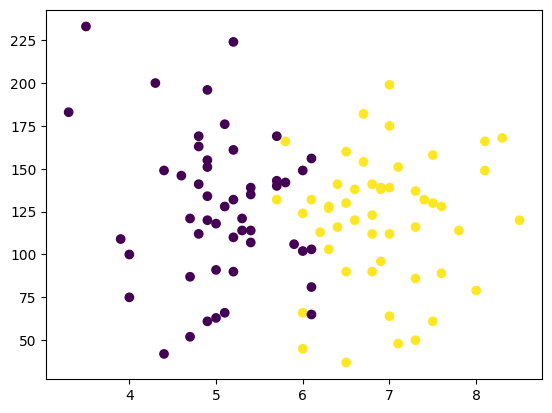

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [27]:
#Extract I/O values
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [24]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [28]:
y.shape

(100,)

In [29]:
#Scale the values 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [30]:
X_train

,cgpa,iq
33,6.0,149.0
14,6.1,103.0
21,7.1,151.0
32,7.0,139.0
20,6.6,120.0
...,...,...
45,6.0,66.0
15,5.1,176.0
26,7.0,199.0
48,6.6,138.0


In [31]:
y_train

33    0
14    0
21    1
32    1
20    1
     ..
45    1
15    0
26    1
48    1
43    1
Name: placement, Length: 90, dtype: int64

In [33]:
X_test

,cgpa,iq
42,7.6,89.0
75,4.8,169.0
38,6.5,160.0
52,7.0,175.0
69,8.5,120.0
90,7.3,86.0
3,7.4,132.0
65,8.1,166.0
82,6.5,37.0
1,5.9,106.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.10628287,  0.64655649],
       [ 0.19738247, -0.52130733],
       [ 1.10837851,  0.69733318],
       [ 1.01727891,  0.39267305],
       [ 0.65288049, -0.08970548],
       [ 0.92617931, -0.69902574],
       [-0.62251396, -0.8513558 ],
       [ 0.7439801 ,  1.48437185],
       [ 1.92827495, -1.13062759],
       [-1.35131079,  0.64655649],
       [ 0.47068129, -0.19125886],
       [ 1.10837851, -1.91766625],
       [-0.62251396,  0.95121662],
       [-0.98691237,  0.44344974],
       [-0.62251396, -0.34358892],
       [-0.71361356, -1.46067606],
       [ 0.92617931,  0.36728471],
       [ 0.19738247,  0.21495465],
       [ 1.47277693,  0.87505159],
       [ 2.20157376,  1.12893503],
       [-1.35131079, -2.06999631],
       [ 1.47277693,  0.16417796],
       [-1.80680881, -0.36897727],
       [-0.98691237,  1.00199331],
       [-0.44031475,  0.29111968],
       [ 1.29057772, -1.86688956],
       [-0.16701594,  0.49422643],
       [ 0.8350797 , -0.8513558 ],
       [ 1.29057772,

In [36]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.56387653, -0.87674415],
       [-0.98691237,  1.15432337],
       [ 0.56178089,  0.92582828],
       [ 1.01727891,  1.30665344],
       [ 2.38377297, -0.08970548],
       [ 1.29057772, -0.95290918],
       [ 1.38167732,  0.21495465],
       [ 2.01937455,  1.07815834],
       [ 0.56178089, -2.19693803],
       [ 0.01518327, -0.4451423 ]])

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [38]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_test

42    1
75    0
38    1
52    1
69    1
90    1
3     1
65    1
82    1
1     0
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score     
accuracy_score(y_test,y_pred)

1.0

<Axes: >

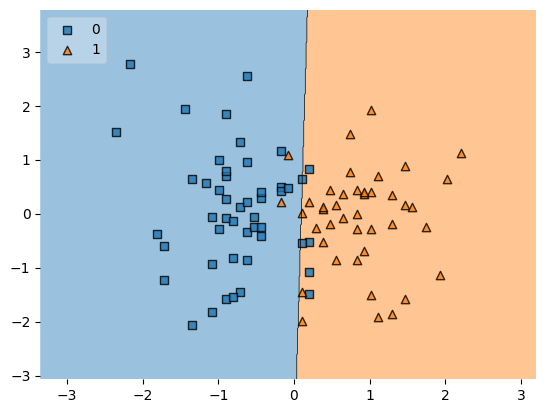

In [41]:
from mlxtend.plotting import plot_decision_regions  
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle

In [43]:
pickle.dump(clf,open('model.pkl','wb'))